## Problem 1

In [124]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev
from scipy import interpolate

Market clearing:  
  
$$
q_1^1 = -q_1^2 \\
q_2^1 = -q_2^2
$$
  
Utility maximasing problem for agent h:  
  
$$\max{v(c_0^h) + \frac{1}{4}\sum_{i=1}^{4}v(c_s^h)}$$  
$$\textit{s.t.  }c_0^h = e_0^h - p_1q_1^h - p_2q_2^h$$  
$$\textit{where  }c_s^h = e_s^h + q_1^hA_s^h + q_2^hA_s^h$$

In [2]:
e = np.array([[1,1,2,1,2],
              [1,3,1,3,1]])
A = np.array([[1,1,1,1],
              [1,1,1.5,1.5]])
gamma = 2


def v_prime(c, gamma):
    return c ** -gamma

def FOC(x):
    '''x is the list of unknowns [p1, p2, q1, q2]'''
    
    p1 = x[0]
    p2 = x[1]
    q1 = x[2]
    q2 = x[3]

    c = np.zeros((e.shape))
    c[0][0] = e[0][0] - p1*q1 - p2*q2
    c[1][0] = e[1][0] + p1*q1 + p2*q2
    
    for s in range(1,5):
        c[0][s] = e[0][s] + q1*A[0, s-1] + q2*A[1, s-1]
        c[1][s] = e[1][s] - q1*A[0, s-1] - q2*A[1, s-1]
    
    sum_11 = 0
    sum_12 = 0
    sum_21 = 0
    sum_22 = 0
    
    for s in range(1,5):
        sum_11 += v_prime(c[0][s], gamma) * A[0][s-1]
        sum_12 += v_prime(c[0][s], gamma) * A[1][s-1]
        sum_21 += v_prime(c[1][s], gamma) * A[0][s-1]
        sum_22 += v_prime(c[1][s], gamma) * A[1][s-1]

    FOC1 = - p1 * v_prime(c[0][0], gamma) + 1/4 * sum_11
    FOC2 = - p2 * v_prime(c[0][0], gamma) + 1/4 * sum_12
    FOC3 = - p1 * v_prime(c[1][0], gamma) + 1/4 * sum_21
    FOC4 = - p2 * v_prime(c[1][0], gamma) + 1/4 * sum_22

    return np.array([FOC1,FOC2,FOC3,FOC4])

print(optimize.root(FOC, x0 = [1,1,0,0]))

    fjac: array([[-0.68575796,  0.04625939, -0.72506109, -0.04338778],
       [-0.04925708, -0.77120037,  0.03530471, -0.63370128],
       [ 0.48620599,  0.46576638, -0.39264464, -0.6264947 ],
       [-0.53936397,  0.43147624,  0.56468591, -0.45171294]])
     fun: array([ 4.65238958e-11,  6.61867228e-11, -3.56298324e-11, -3.56995544e-11])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-4.92930660e-10, -1.19829763e-09, -2.36371148e-09, -3.77368201e-11])
       r: array([ 1.41574066, -0.01108599, -0.25926261, -0.33930651,  1.42822841,
        0.46175253,  0.56322445, -3.96922262, -5.06758189, -0.06033892])
  status: 1
 success: True
       x: array([5.89777656e-01, 7.37222070e-01, 1.95406655e-02, 8.83418572e-12])


## Problem 2
- set up works as the program did go through everything, but was not able to find a way to iterate

In [5]:
# Suppose I take 1, opponent take 2
board = np.zeros((3,3), dtype = int)
# Value: 0 if intermediate or , 1 if win, -1 if lose
# Policy: assign 1 to one of the empty square

In [6]:
def initial_value(board, player = {'1', '2'}):
    value = 0
    for i in [0, 1, 2]:
        if (board[i][0], board[i][1], board[i][2]) == (1,1,1):
            value = 1
        elif (board[i][0], board[i][1], board[i][2]) == (2,2,2):
            value = -1
    for j in [0, 1, 2]:
        if (board[0][j], board[1][j], board[2][j]) == (1,1,1):
            value = 1
        elif (board[0][j], board[1][j], board[2][j]) == (2,2,2):
            value = -1
    if (board[0][0], board[1][1], board[2][2]) == (1,1,1):
        value = 1
    elif (board[0][0], board[1][1], board[2][2]) == (2,2,2):
        value = -1
    elif (board[2][0], board[1][1], board[0][2]) == (1,1,1):
        value = 1
    elif (board[2][0], board[1][1], board[0][2]) == (2,2,2):
        value = -1
    if player == '1':
        return value
    if player == '2':
        return value

In [7]:
board = np.zeros((3,3))
board[1,1] = 1
board[0,1] = 1
board[2,1] = 1
initial_value(board, '1')

1

In [8]:
def state_to_board(state_str):
    '''state is a string representation of the board'''
    board = np.eye(3, dtype = int)
    for i in range(len(state_str)):
        if 0 <= i <= 2:
            board[0][i] = int(state_str[i])
        elif 2 <= i <= 5:
            board[1][i-3] = int(state_str[i])
        else:
            print(i)
            board[2][i-6] = int(state_str[i])
    return board

In [9]:
def board_to_state(board):
    state_str = ''
    for i in range(len(board)):
        for j in range(len(board[0])):
            str_num = str(board[i][j])
            state_str += str_num
    return state_str

In [10]:
def disgard_move_first(board):
    state_str = board_to_state(board)    
    if abs(state_str.count('2') - state_str.count('1')) > 1:
        return False
    elif state_str.count('2') - state_str.count('1') > 0:
        return False
    # have to deal with same number of 1's and 2's but already ended
    else:
        return True
    
def disgard_move_second(board):
    state_str = board_to_state(board)    
    if abs(state_str.count('1') - state_str.count('2')) > 1:
        return False
    elif state_str.count('1') - state_str.count('2') > 0:
        return False
    else:
        return True

In [11]:
def mover_check(board):
    '''Return 1 if 1 should move, 2 if 2 should move'''
    state_str = board_to_state(board)
    if board.any() == np.zeros((3,3)).any():
        return '1'
    elif state_str.count('1') == state_str.count('2'):
        return '1'
    else:
        return '2'
    
def end_check(board):
    '''return a string if ends, False if not'''
    if initial_value(board, '1') == 1:
        return 'Game ended, computer wins'
    elif initial_value(board, '1') == -1:
        return 'Game ended, you win'
    elif board.all() != 0:
        return 'Game ended, draw'
    else:
        return False

def value_function(board, i):
    mover = mover_check(board)
    value = initial_value(board, mover)
    value += initial_value(policy_function(board, i), mover)
    return value

def policy_function(board, i):
    state_str = board_to_state(board)
    mover = mover_check(board)
    flatten_board = board.flatten()
    flatten_board[i] = int(mover)
    policy = flatten_board.reshape((3,3))
    return policy

In [12]:
def VFI(board):
    state_str = board_to_state(board)
    value = []
    policy = []
    i = 0
    while i < len(state_str):
        flatten_board = board.flatten()
        if abs(flatten_board[i] - 0) < 1e-6:
            policy.append(policy_function(board, i))
            value.append(value_function(board, i))
        i += 1
    board = policy_function(board, i-1)
    return value, policy

def iteration(board):
    mover = mover_check(board)
    values = [initial_value(board, mover)]
    policies = [board]
    i = 0
    while i < len(policies):
        board = policies[i]
        if end_check(board) == False:
            values += VFI(board)[0]
            policies += VFI(board)[1]
        i += 1
    return values, policies
        
    

In [14]:
board = np.array([[0,2,0],
                  [0,2,1],
                  [0,0,0]])
print(iteration(board)[0])

[0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, -1, -1, 0, -1, -1, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, -1, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, -1, 0, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


## Problem 3

In [116]:
production_func_1 = lambda k: 0.9*k**0.3 + 0.3*k
production_func_2 = lambda k: 1.1*k**0.3 + 0.9*k
u = lambda c: np.log(c)

def actionvalue_allchoices(k_index, V_old):
    '''
    Calculates the current utility of all the discrete k's
    
    input:
    k_index: index so that k_grid[index] corresponds to value of capital this period (state)
    V_old: approximation to the value function, V_old[i] approximates V(k_grid[i])
    
    output:
    action_value: value of all possible state-action pairs.
    '''
    
    k = k_grid[k_index]
    
    action_value = np.zeros_like(V_old)
    c = np.zeros_like(V_old)
    
    c[0] = production_func_1(k) - k_grid # consumption implied by policy k_next for current k in state 1
    c[1] = production_func_2(k) - k_grid # consumption implied by policy k_next for current k in state 2
    action_value[c <= 0] = -999999
    action_value[c > 0] = u(c[c > 0])
    
    EV_old=V_old.mean(axis=0)
    action_value=action_value + beta * EV_old #(2,N)
    
    return action_value

def vf_update(i, V_old):
    '''
    i: index corresponding to the entry of the value-function vector which was to be update by the function
    V_old: value function vector from the previous iteration
    
    output:
    Vi_new: updated value for the value function vector at entry i. 
    '''
    Vi_new = np.max(actionvalue_allchoices(i, V_old), axis = 1)
#     pi = k_grid[np.argmax(actionvalue_allchoices(i, V_old))] # keep track of the policy
    
    return Vi_new

def vf_update_iteration(V_old):
    
    V_new = np.zeros_like(V_old)
    
    for i in range(len(V_old[0])):
        V_new[:,i] = vf_update(i, V_old)
        
    return V_new

In [272]:
def iteration2convergence(initialV, maxiter, threshold, plot = False, plot_interval = 50):
    difference_list = []
    V = initialV.copy()
    for i in range(maxiter):
        
        V_new = vf_update_iteration(V)
        difference = np.max(np.abs(V_new - V))
        
        difference_list.append(difference)
        
        V = V_new
        
        if plot == True:
            if i%plot_interval == 0:
                print('iteration: {}'.format(i + 1))
                plt.figure()
                plt.figure()
                plt.plot(np.arange(1, i+2), np.log10(np.array(difference_list)))
                plt.xlabel('Iteration')
                plt.ylabel('Maximum update [log10]')
                plt.show()
        
        if difference < threshold:
            print('Convergence achieved after interation {}'.format(i + 1))
            plt.figure()
            plt.plot(k_grid, V[0], label = 'shock 1')
            plt.plot(k_grid, V[1], label = 'shock 2')
            plt.xlabel('k')
            plt.ylabel('V(k)')
            plt.title('Value function after convergence')
            plt.legend()
            plt.show()
            break
    return V

iteration: 1


<Figure size 432x288 with 0 Axes>

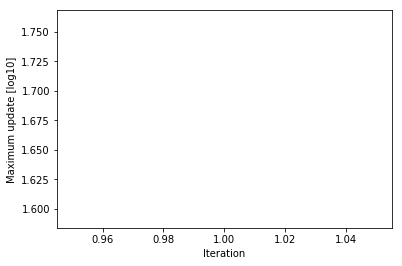

iteration: 51


<Figure size 432x288 with 0 Axes>

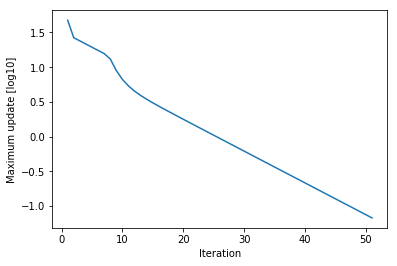

iteration: 101


<Figure size 432x288 with 0 Axes>

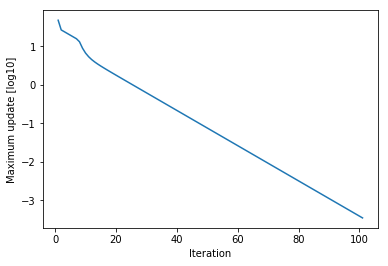

iteration: 151


<Figure size 432x288 with 0 Axes>

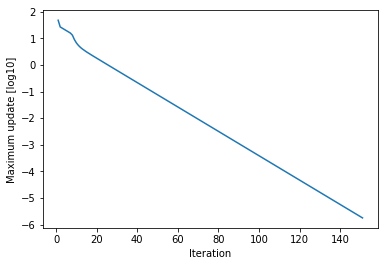

iteration: 201


<Figure size 432x288 with 0 Axes>

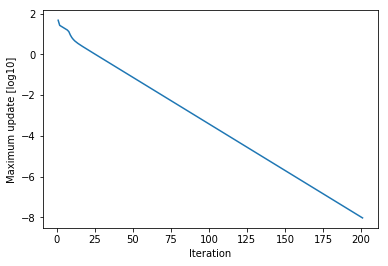

Convergence achieved after interation 244


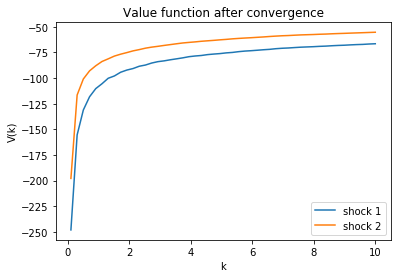

In [273]:
N = 50 # number of grid_points for the capital grid
beta = 0.9 # discount factor
k_low = 0.1 # lower bound for capital grid
k_high = 10 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N) # grid for capital
V_init = np.zeros((2,N)) # initial values

V = iteration2convergence(V_init, 1000, 1e-10, plot = True, plot_interval = 50)

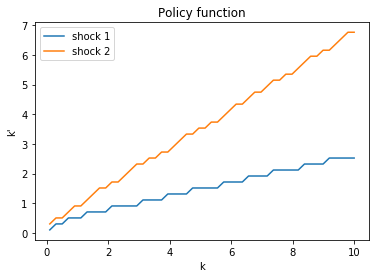

In [120]:
def extract_policy_shock(V, shocknumber):
    p = np.zeros_like(V[0])
    
    for i in range(len(p)):
        p[i] = k_grid[np.argmax(actionvalue_allchoices(i, V)[shocknumber])]
                
    return p

plt.figure()
plt.plot(k_grid, extract_policy_shock(V, 0), label = 'shock 1')
plt.plot(k_grid, extract_policy_shock(V, 1), label = 'shock 2')
plt.xlabel('k')
plt.ylabel("k'")
plt.title('Policy function')
plt.legend()
plt.show();

Convergence achieved after interation 215


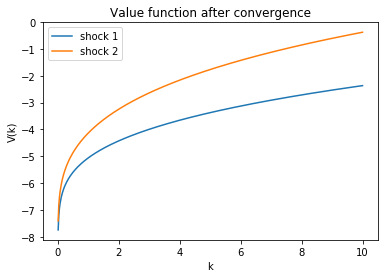

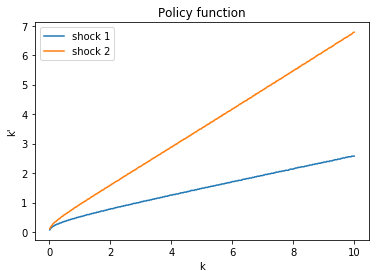

In [122]:
N = 500 # number of grid_points for the capital grid
beta = 0.9 # discount factor
k_low = 0.01 # lower bound for capital grid, adjusted to 0.01 as now we have 500 points
k_high = 10 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N) # grid for capital
V_init = np.zeros((2,N)) # initial values

V = iteration2convergence(V_init, 1000, 1e-10, plot = False)

plt.figure()
plt.plot(k_grid, extract_policy_shock(V, 0), label = 'shock 1')
plt.plot(k_grid, extract_policy_shock(V, 1), label = 'shock 2')
plt.xlabel('k')
plt.ylabel("k'")
plt.title('Policy function')
plt.legend()
plt.show();

## Problem 4

In [268]:
# def policy_func_approx_pwlinear(k_grid, policy_function_values):
#     interp1 = interpolate.interp1d(k_grid, policy_function_values[0], kind = 'linear', fill_value = 'extrapolate')
#     interp2 = interpolate.interp1d(k_grid, policy_function_values[1], kind = 'linear', fill_value = 'extrapolate')
#     return interp1, interp2
    
def euler(x, shock, beta, k, K, k_grid):
    interp1 = interpolate.interp1d(k_grid, K[0], kind = 'linear', fill_value = 'extrapolate')
    interp2 = interpolate.interp1d(k_grid, K[1], kind = 'linear', fill_value = 'extrapolate')
    
    euler1 = abs(beta * 0.5 * (f_prime_1(x) * u_prime(f_1(x) - interp1(x)) + \
                               f_prime_2(x) * u_prime(f_2(x) - interp2(x))) - u_prime(f_1(k) - x))
    euler2 = abs(beta * 0.5 * (f_prime_1(x) * u_prime(f_1(x) - interp1(x)) + \
                               f_prime_2(x) * u_prime(f_2(x) - interp2(x))) - u_prime(f_2(k) - x))

    if shock == 0:
        return euler1
    if shock == 1:
        return euler2

def policy_func_iter(maxiter, tol = 1e-4, plot = False, plot_interval = 10):
    K = np.ones((2,N)) * k_low
    euler_error = np.ones((2,N))
    errors = []
    i = 0
    while i < maxiter:
        for j in range(N):
            for z in (0, 1):
                k = k_grid[j]
                sol = optimize.fsolve(euler, K[z, j], args = (z, beta, k, K, k_grid))
                K[z, j] = sol
                euler_error[z, j] = euler(sol, z, beta, k, K, k_grid)
                
#         for j in range(N):
#             for z in (0, 1):
#                 euler_error[z, j] = euler(K[z, j], z, beta, k, K, k_grid)
        max_error = np.max(np.abs(euler_error))
        errors.append(max_error)
        
        i += 1
        
        if max_error < tol:
            print('euler error is less than {} after {} iterations'.format(tol, i))
            plt.plot(k_grid, K[0], label = 'shock 1')
            plt.plot(k_grid, K[1], label = 'shock 2')
            plt.xlabel('k')
            plt.ylabel('k\'')
            plt.legend()
            plt.show()
            
            return K
        
        
        if plot == True:
            if i%plot_interval == 0:
                print('iteration: {} with euler error {}'.format(i, max_error))
                plt.figure()
                plt.plot(np.arange(1, i+1), errors)
                plt.xlabel('Iteration')
                plt.ylabel('Euler erros')
                plt.show()
    print('After {} iterations, euler error is {}, still larger than {}'.format(i, max_error, i))            
    plt.plot(k_grid, K[0], label = 'shock 1')
    plt.plot(k_grid, K[1], label = 'shock 2')
    plt.xlabel('k')
    plt.ylabel('k\'')
    plt.legend()
    plt.show()
    
    return K

iteration: 10 with euler error 2.1245708823780518e-05


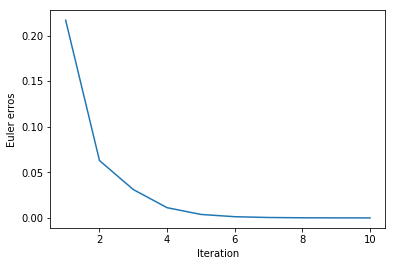

euler error is less than 1e-07 after 16 iterations


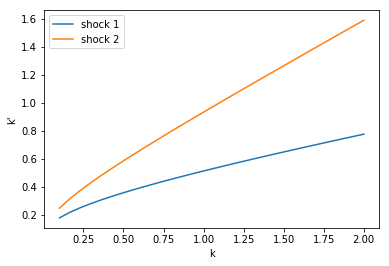

array([[0.17957794, 0.21973236, 0.25279811, 0.2820089 , 0.30869858,
        0.33352254, 0.35713305, 0.37956994, 0.40118774, 0.42218932,
        0.44253118, 0.46238439, 0.48186411, 0.50095067, 0.51965368,
        0.53810609, 0.55633687, 0.57425617, 0.59197996, 0.60954261,
        0.6269435 , 0.64412754, 0.66118973, 0.67814071, 0.69496019,
        0.71162123, 0.72819471, 0.7446874 , 0.76107787, 0.77734978],
       [0.24928842, 0.31701394, 0.37641394, 0.43132848, 0.48337877,
        0.5334662 , 0.58216009, 0.62980053, 0.67656107, 0.72264023,
        0.76819205, 0.81327717, 0.85796124, 0.90234946, 0.94646429,
        0.99030039, 1.03395165, 1.07742714, 1.12073449, 1.16391823,
        1.20696789, 1.24989434, 1.29274572, 1.33551654, 1.37820314,
        1.4208319 , 1.46337748, 1.50587504, 1.54834159, 1.59076062]])

In [269]:
u = lambda c: np.log(c)
u_prime = lambda c: 1/c
f_1 = lambda k: 0.9*k**0.3 + 0.3*k
f_2 = lambda k: 1.1*k**0.3 + 0.9*k
f_prime_1 = lambda k: 0.3*0.9 * k**(-0.7) + 0.3
f_prime_2 = lambda k: 1.1*0.3 * k**(-0.7) + 0.9

N = 30 # number of grid_points for the capital grid
beta = 0.9 # discount factor
k_low = 0.1 # lower bound for capital grid, adjusted to 0.01 as now we have 500 points
k_high = 2 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N) # grid for capital

policy_func_iter(200, tol = 1e-7, plot = True)

In [270]:
u = lambda c: -c**(-4)
u_prime = lambda c: 4*c**(-5)
f_1 = lambda k: 0.9*k**0.3 + 0.3*k
f_2 = lambda k: 1.1*k**0.3 + 0.9*k
f_prime_1 = lambda k: 0.3*0.9 * k**(-0.7) + 0.3
f_prime_2 = lambda k: 1.1*0.3 * k**(-0.7) + 0.9

N = 30 # number of grid_points for the capital grid
beta = 0.999 # discount factor
k_low = 0.1 # lower bound for capital grid, adjusted to 0.01 as now we have 500 points
k_high = 2 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N) # grid for capital

F:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
F:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sy

iteration: 50 with euler error 8.520242252464094


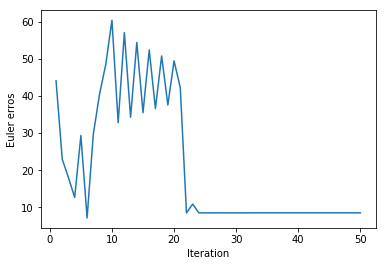

iteration: 100 with euler error 8.520242699696542


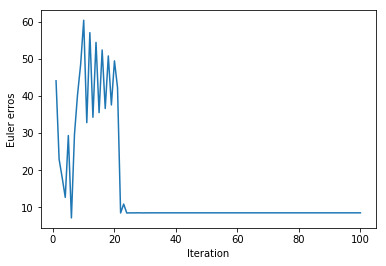

iteration: 150 with euler error 8.520242699696542


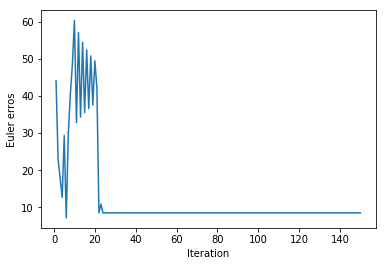

iteration: 200 with euler error 8.520242699696542


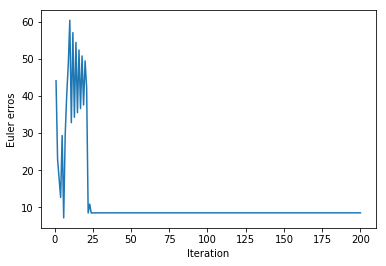

After 200 iterations, euler error is 8.520242699696542, still larger than 200


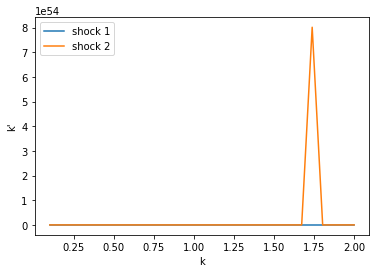

array([[1.19109750e-01, 1.69612663e-01, 2.13687601e-01, 2.54493131e-01,
        2.93034784e-01, 3.29478475e-01, 3.64809236e-01, 3.98604253e-01,
        4.31702044e-01, 4.63820453e-01, 4.95452859e-01, 5.26248994e-01,
        5.56705541e-01, 5.86498795e-01, 6.15999911e-01, 6.44925415e-01,
        6.73502353e-01, 7.01851551e-01, 7.29981954e-01, 7.57930665e-01,
        7.85544192e-01, 8.13021534e-01, 8.39969214e-01, 8.66638970e-01,
        8.93089363e-01, 9.19134155e-01, 9.45079971e-01, 9.71251704e-01,
        9.97449568e-01, 1.02355310e+00],
       [2.08829439e-01, 3.05195784e-01, 3.93803239e-01, 4.77963799e-01,
        5.59077080e-01, 6.37671907e-01, 7.14383901e-01, 7.90107440e-01,
        8.64151546e-01, 9.36380414e-01, 1.00886531e+00, 1.08118398e+00,
        1.14994925e+00, 1.21670509e+00, 1.28719019e+00, 1.35811932e+00,
        1.42048166e+00, 1.47721652e+00, 1.54567408e+00, 1.62168434e+00,
        1.67239166e+00, 1.68860670e+00, 1.75435547e+00, 1.85435673e+00,
        1.91347007e+00,

In [271]:
policy_func_iter(200, tol = 5, plot = True, plot_interval = 50)

# euler error gets really big in the first few iterations, and it is never less than a tolerance level of even 5, which is quite a large euler error
# if we print the euler errors, we see that the euler error stays at 8.52.